In [89]:
# Importando as dependencias
import requests as rq
import json as js
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [90]:
# Definindo o site já pasando os parametros
site = 'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?request=execute&identifier=SinglePoint&parameters=ALLSKY_SFC_SW_DWN&userCommunity=SSE&tempAverage=CLIMATOLOGY&outputList=JSON&lat=-14.8990&lon=-46.7910&user=anonymous'

# Os parametros passados são:
# - parameters=ALLSKY_SFC_SW_DWN
# - tempAverage=CLIMATOLOGY
# - outputList=JSON
# - lat=-14.8990
# - lon=-46.7910

In [91]:
# Criando os métodos necessarios:
def requisicao(site):
    req = requests.get(site)
    dic = json.loads(req.text)
    return dic

def trataJSON(dicionario):
    dicionario = dicionario['features']
    lista =  dicionario[0]
    lista = lista['properties']
    lista = lista['parameter']
    lista = lista['ALLSKY_SFC_SW_DWN']
    del(lista['13'])
    return lista

def corrigeMes(lista):
    lis = []
    for e in lista:
        if(e=='1'):
            data='January'
        elif(e=='2'):
            data='February'
        elif(e=='3'):
            data='March'
        elif(e=='4'):
            data='April'
        elif(e=='5'):
            data='May'
        elif(e=='6'):
            data='June'
        elif(e=='7'):
            data='July'
        elif(e=='8'):
            data='August'
        elif(e=='9'):
            data='September'
        elif(e=='10'):
            data='October'
        elif(e=='11'):
            data='November'
        elif(e=='12'):
            data='December'
        lis.append(data)
    return lis

In [92]:
# Obetendo os dados da API e comecando a trata-los.
dicionario = requisicao(site)
lista = trataJSON(dicionario)
print(lista)

{'1': 5.52, '2': 5.68, '3': 5.33, '4': 5.43, '5': 5.21, '6': 5.16, '7': 5.36, '8': 5.86, '9': 6.04, '10': 5.53, '11': 5.13, '12': 4.95}


In [93]:
# Como os dados vem em formato de dicionario, optei por realizar aas manupulaçoes para transforma-lo em um dataframe.

In [94]:
base = {}
lis = corrigeMes(lista)
for i in range(len(lis)):
    base[lis[i]] = values[i]

x = {'date':lis, 'value':values}
print(x)

{'date': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 'value': [5.52, 5.68, 5.33, 5.43, 5.21, 5.16, 5.36, 5.86, 6.04, 5.53, 5.13, 4.95]}


In [95]:
df = pd.DataFrame(data=x)
print(df)

         date  value
0     January   5.52
1    February   5.68
2       March   5.33
3       April   5.43
4         May   5.21
5        June   5.16
6        July   5.36
7      August   5.86
8   September   6.04
9     October   5.53
10   November   5.13
11   December   4.95


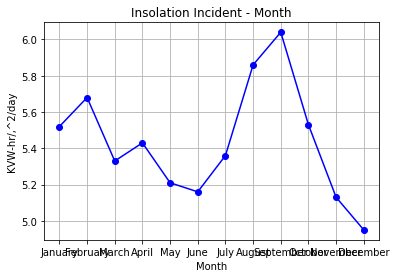

In [97]:
plt.plot(df['date'], df['value'],'go', color='blue')
plt.plot(df['date'], df['value'],color='blue')

plt.title("Insolation Incident - Month")

plt.grid(True)
plt.xlabel("Month")
plt.ylabel("KVW-hr/,^2/day")
plt.show()